# 作业1：Numpy练习

本次作业主要对Python中的矩阵运算库Numpy进行练习。如遇到不清楚的函数或主题，可以查阅[官方文档](https://numpy.org/doc/stable/user/index.html)或利用搜索引擎寻求帮助。

### 基础知识

本节对Numpy进行简要介绍，没有实际的题目，可直接运行每一个单元格。

首先导入Numpy包：

In [2]:
import numpy as np

利用Numpy可以方便地创建向量和矩阵：

In [2]:
vec = np.array([1.0, 2.0, 5.0])
print(vec)

[1. 2. 5.]


In [3]:
mat = np.array([[1.0, 2.0, 2.0], [3.0, 5.0, 4.5]])
print(mat)

[[1.  2.  2. ]
 [3.  5.  4.5]]


In [4]:
vec = np.linspace(start=1.0, stop=5.0, num=12)
print(vec)

[1.         1.36363636 1.72727273 2.09090909 2.45454545 2.81818182
 3.18181818 3.54545455 3.90909091 4.27272727 4.63636364 5.        ]


linespace用于生成等距数字，num为生成数字的个数

In [5]:
mat = np.reshape(vec, (3, 4))
print(mat)

[[1.         1.36363636 1.72727273 2.09090909]
 [2.45454545 2.81818182 3.18181818 3.54545455]
 [3.90909091 4.27272727 4.63636364 5.        ]]


Python中下标是从0开始的，请一定要记住这一点，否则会造成很多逻辑错误。

In [6]:
print(vec[0])
print(vec[2])
print(mat[1, 1])

1.0
1.7272727272727273
2.8181818181818183


负数的下标表示从尾部往前数：

In [7]:
print(vec[-1])
print(vec[-2])
print(mat[1, -1])

5.0
4.636363636363637
3.5454545454545454


可以用冒号选取向量中的一段范围，格式为`x[start:end]`，选出的元素包含`x[start]`，不包含`x[end]`。

In [8]:
print(vec[1:3])

[1.36363636 1.72727273]


In [9]:
print(mat[:, :2])

[[1.         1.36363636]
 [2.45454545 2.81818182]
 [3.90909091 4.27272727]]


在编写函数时，经常需要各种测试数据，此时可以用Numpy来生成各类随机数。在需要用到随机数之前，一定要先设置随机数种子，以使结果可重复。

In [11]:
np.random.seed(123)

生成均匀分布随机数：

In [12]:
unif = np.random.uniform(low=0.0, high=1.0, size=5)
print(unif)

[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897]


正态分布随机数：

In [13]:
norm = np.random.normal(loc=0.0, scale=1.0, size=(2, 5))
print(norm)

[[ 0.32210607 -0.05151772 -0.20420096  1.97934843 -1.61930007]
 [-1.11396442 -0.44744072  1.66840161 -0.14337247 -0.6191909 ]]


Numpy提供了许多数学函数对向量和矩阵进行操作：

In [14]:
print(np.exp(norm))

[[1.38003115 0.94978682 0.81529851 7.23802539 0.19803726]
 [0.32825504 0.63926211 5.30368367 0.86643129 0.53837986]]


In [15]:
print(np.log(unif))

[-0.36173173 -1.2512764  -1.48345987 -0.59544936 -0.32924188]


也可以对向量和矩阵进行汇总：

In [16]:
np.sum(unif)

2.4802437129808985

In [17]:
np.mean(norm)

-0.02291311494411293

汇总可以按行或者按列进行，这由`axis`参数决定。0表示运算时第一个维度（行）在变化，1表示运算时第二个维度（列）在变化。
再次提醒，Python中以0表示第一个元素！

In [18]:
np.mean(norm, axis=0)  # 对第一个维度（行标在变化）求均值

array([-0.39592917, -0.24947922,  0.73210032,  0.91798798, -1.11924548])

In [19]:
np.var(norm, axis=1)  # 对第二个维度（列标在变化）求方差

array([1.33033757, 0.90853666])

### 第1题

(a) 生成10000个服从(0, 1)间均匀分布的随机数，赋值给变量`x`，并打印其**前10个**元素。

In [22]:
x=np.random.uniform(low=0.0, high=1.0, size=10000)
print(x[0:10])

[0.76630591 0.26137205 0.24871377 0.44452403 0.05886304 0.74581758
 0.78373487 0.51355382 0.54889301 0.60866522]


(b) 创建向量`y`，令其在数学上等于`y=-log(x)`，其中`log`为自然对数。打印`y`的**最后10个**元素。

In [24]:
y=0-np.log(x)
print(y[-10:])

[0.43955942 0.53288818 0.80857644 1.46796263 1.43842091 2.42123934
 0.41541317 0.01896608 0.18965739 0.05997996]


(c) 查找在Python中绘制图形的方法，绘制`y`的直方图。

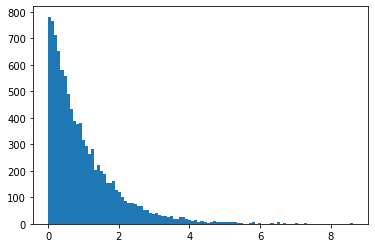

In [31]:
import matplotlib.pyplot as plt
plt.hist(y,bins=100)
plt.show()

(d) 猜测或证明`y`服从什么分布，并简要说明理由。

经过计算发现F(y)=1-e^(-y),因此认为服从指数分布

### 第2题

(a) 考虑Sigmoid函数 $$\sigma(x)=\frac{e^x}{1+e^x}$$

请在Python中编写一个函数`sigmoid(x)`，令其可以接收一个向量`x`，返回Sigmoid函数在`x`上的取值。

In [3]:
def sigmoid(x):
    return np.exp(x)/(1+np.exp(x))
x=np.array([1,2,3])
print(sigmoid(x))

[0.73105858 0.88079708 0.95257413]


(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [44]:
x=np.array([-1000, -100, -10, 0, 10, 100, 1000])
print(sigmoid(x))

[0.00000000e+00 3.72007598e-44 4.53978687e-05 5.00000000e-01
 9.99954602e-01 1.00000000e+00            nan]


D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


(c) 如果出现警告或错误，思考可能的原因是什么。（提示：Sigmoid函数真实的取值范围是多少？分子和分母的取值范围又是什么？是否可以对Sigmoid函数的表达式进行某种等价变换？）如果一切正常，可忽略此问题。

答：出现了错误警告，函数的取值范围为（0，1）分子分母的取值范围均为0到正无穷，当分子分母向无限大、无限小趋近时，计算过程中出现了指数溢出的现象，后续需要对算式进行调整以避免这种现象的发生

(d) 请再次尝试编写`sigmoid(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。

In [20]:
import numpy as np
def sigmoid(x):
    x1=x.tolist()
    y=[]
    for i in x1:
        if i>0:
            y.append(1/1+(np.exp(-i)))
        else:
            y.append(np.exp(i)/1+np.exp(i))
    y=np.array(y)
    y=y.reshape(x.shape)
    return y
x=np.array([-1000, -100, -10, 0, 10, 100, 1000])
print(sigmoid(x))

[0.00000000e+00 7.44015195e-44 9.07998595e-05 2.00000000e+00
 1.00004540e+00 1.00000000e+00 1.00000000e+00]


### 第3题

(a) 考虑Softplus函数 $$\mathrm{softplus}(x)=\log(1+e^x)$$

请在Python中编写一个函数`softplus(x)`，令其可以接收一个向量`x`，返回Softplus函数在`x`上的取值。

In [36]:
def softplus(x):
    return np.log(1+np.exp(x))
x=np.array([1,2,3])
print(softplus(x))

[1.31326169 2.12692801 3.04858735]


(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [48]:
x=np.array([-1000,-100,-10,0,10,100,1000])
print(softplus(x))

[0.00000000e+00 0.00000000e+00 4.53988992e-05 6.93147181e-01
 1.00000454e+01 1.00000000e+02            inf]


(c) 如果出现警告或错误，参照第2题的方法，思考可能的原因是什么。如果一切正常，可忽略此问题。

答：运行代码时，某些数字的计算过程中出现了指数溢出的现象

(d) 请再次尝试编写`softplus(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。

In [26]:
def softplus(x):
    x1=x.tolist()
    y=[]
    for i in x1:
        if i>0:
            y.append(np.log(1+np.exp(-i))-i)
        else:
            y.append(np.log(1+np.exp(i)))
    y=np.array(y)
    y=y.reshape(x.shape)
    return y
x=np.array([-1000,-100,-10,0,10,100,1000])
print(softplus(x))

[ 0.00000000e+00  0.00000000e+00  4.53988992e-05  6.93147181e-01
 -9.99995460e+00 -1.00000000e+02 -1.00000000e+03]
